# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

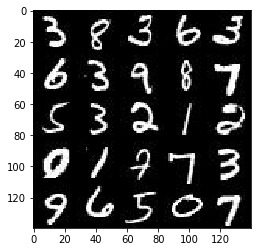

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

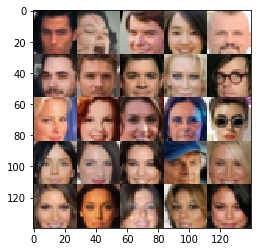

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, [None, z_dim], name='inputs_z')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # hidden layer 1
        h1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * h1, h1)
        relu1 = tf.layers.dropout(relu1, 0.2)
        
        # hidden layer 2
        h2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(h2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        relu2 = tf.layers.dropout(relu2, 0.2)
 
        # hidden layer 3
        h3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(h3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        relu3 = tf.layers.dropout(relu3, 0.2)
        
        # flatten input
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1, activation=None)
        logits = tf.layers.dropout(logits, 0.2)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [14]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1

    with tf.variable_scope('generator', reuse=not is_train):
        # pre
        flat = tf.layers.dense(z, 7*7*1024)
        
        # hidden layer 1
        h1 = tf.reshape(flat, (-1, 7, 7, 1024))
        bn1 = tf.layers.batch_normalization(h1, training=is_train)
        relu1 = tf.maximum(alpha * bn1, bn1)
        relu1 = tf.layers.dropout(relu1, 0.2)
        
        # hidden layer 2
        h2 = tf.layers.conv2d_transpose(relu1, 512, 5, strides=1, padding='same')
        bn2 = tf.layers.batch_normalization(h2, training=is_train)
        relu2 = tf.maximum(alpha * bn2, bn2)
        relu2 = tf.layers.dropout(relu2, 0.2)

        # hidden layer 3
        h3 = tf.layers.conv2d_transpose(relu2, 256, 5, strides=1, padding='same')
        bn3 = tf.layers.batch_normalization(h3, training=is_train)
        relu3 = tf.maximum(alpha * bn3, bn3)
        relu3 = tf.layers.dropout(relu3, 0.2)

        # hidden layer 4
        h4 = tf.layers.conv2d_transpose(relu3, 128, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(h4, training=is_train)
        relu4 = tf.maximum(alpha * bn4, bn4)
        relu4 = tf.layers.dropout(relu4, 0.2)
        
        # output layer
        logits = tf.layers.conv2d_transpose(relu4, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [15]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    # Generator network here
    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    # Disriminator network here
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # Calculate losses
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                                         labels=tf.ones_like(d_logits_real) * (1 - smooth)))

    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                         labels=tf.zeros_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                    labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [16]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [18]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    image_width = data_shape[1]
    image_height = data_shape[2]
    output_dim = data_shape[3]
    
    # The inputs
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, output_dim, z_dim)
    
    # Loss
    d_loss, g_loss = model_loss(input_real, input_z, output_dim)
    
    # Optimazation
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # rescale image
                batch_images = batch_images.reshape(batch_size, image_width, image_height, output_dim)
                batch_images = batch_images*2

                # Random Noise for Generator
                z_noise = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Optimization
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: z_noise, learn_rate: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: z_noise, input_real: batch_images, learn_rate: learning_rate})
                
                # Optimize Generator again 2nd
                _ = sess.run(g_train_opt, feed_dict={input_z: z_noise, input_real: batch_images, learn_rate: learning_rate})

                if steps % 10 == 0:
                    # Determine losses and print
                    d_train_loss = d_loss.eval({input_real: batch_images, input_z: z_noise})
                    g_train_loss = g_loss.eval({input_z: z_noise})

                    print("Epoch {}/{} Batch# {}...".format(epoch_i+1, epoch_count, steps),
                          "Discriminator Loss: {:.4f}...".format(d_train_loss),
                          "Generator Loss: {:.4f}".format(g_train_loss))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, output_dim, data_image_mode)          
            
        print("END")

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 Batch# 10... Discriminator Loss: 4.2355... Generator Loss: 0.3769
Epoch 1/2 Batch# 20... Discriminator Loss: 1.7326... Generator Loss: 5.8925
Epoch 1/2 Batch# 30... Discriminator Loss: 1.6871... Generator Loss: 4.1676
Epoch 1/2 Batch# 40... Discriminator Loss: 2.4659... Generator Loss: 0.4689
Epoch 1/2 Batch# 50... Discriminator Loss: 1.9440... Generator Loss: 0.4441
Epoch 1/2 Batch# 60... Discriminator Loss: 2.0408... Generator Loss: 0.3690
Epoch 1/2 Batch# 70... Discriminator Loss: 2.1629... Generator Loss: 0.4623
Epoch 1/2 Batch# 80... Discriminator Loss: 2.1304... Generator Loss: 0.7982
Epoch 1/2 Batch# 90... Discriminator Loss: 1.8200... Generator Loss: 0.9568
Epoch 1/2 Batch# 100... Discriminator Loss: 1.5827... Generator Loss: 0.5157


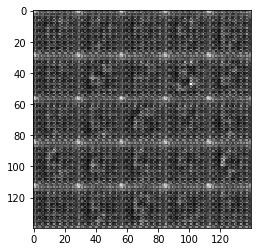

Epoch 1/2 Batch# 110... Discriminator Loss: 1.8780... Generator Loss: 0.3639
Epoch 1/2 Batch# 120... Discriminator Loss: 1.6924... Generator Loss: 0.4363
Epoch 1/2 Batch# 130... Discriminator Loss: 1.4994... Generator Loss: 1.0021
Epoch 1/2 Batch# 140... Discriminator Loss: 1.6225... Generator Loss: 0.6213
Epoch 1/2 Batch# 150... Discriminator Loss: 1.4914... Generator Loss: 0.5653
Epoch 1/2 Batch# 160... Discriminator Loss: 1.6939... Generator Loss: 1.4243
Epoch 1/2 Batch# 170... Discriminator Loss: 1.4819... Generator Loss: 1.0565
Epoch 1/2 Batch# 180... Discriminator Loss: 1.5628... Generator Loss: 1.0137
Epoch 1/2 Batch# 190... Discriminator Loss: 1.4939... Generator Loss: 0.9775
Epoch 1/2 Batch# 200... Discriminator Loss: 1.5887... Generator Loss: 0.5000


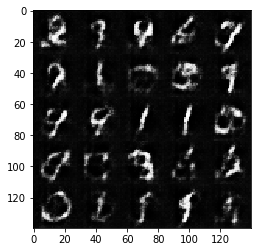

Epoch 1/2 Batch# 210... Discriminator Loss: 1.6924... Generator Loss: 0.4217
Epoch 1/2 Batch# 220... Discriminator Loss: 1.5758... Generator Loss: 0.5013
Epoch 1/2 Batch# 230... Discriminator Loss: 1.6202... Generator Loss: 1.2644
Epoch 1/2 Batch# 240... Discriminator Loss: 1.5629... Generator Loss: 0.6510
Epoch 1/2 Batch# 250... Discriminator Loss: 1.6879... Generator Loss: 0.3934
Epoch 1/2 Batch# 260... Discriminator Loss: 1.6639... Generator Loss: 0.3976
Epoch 1/2 Batch# 270... Discriminator Loss: 1.4832... Generator Loss: 0.6834
Epoch 1/2 Batch# 280... Discriminator Loss: 1.4966... Generator Loss: 0.6792
Epoch 1/2 Batch# 290... Discriminator Loss: 1.7686... Generator Loss: 1.3709
Epoch 1/2 Batch# 300... Discriminator Loss: 1.5020... Generator Loss: 0.5481


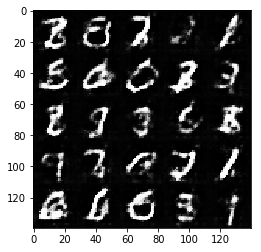

Epoch 1/2 Batch# 310... Discriminator Loss: 1.7184... Generator Loss: 0.3479
Epoch 1/2 Batch# 320... Discriminator Loss: 1.4680... Generator Loss: 0.7747
Epoch 1/2 Batch# 330... Discriminator Loss: 1.4339... Generator Loss: 0.7134
Epoch 1/2 Batch# 340... Discriminator Loss: 1.4813... Generator Loss: 0.9779
Epoch 1/2 Batch# 350... Discriminator Loss: 1.4907... Generator Loss: 0.7223
Epoch 1/2 Batch# 360... Discriminator Loss: 1.3713... Generator Loss: 0.9975
Epoch 1/2 Batch# 370... Discriminator Loss: 1.5395... Generator Loss: 0.7465
Epoch 1/2 Batch# 380... Discriminator Loss: 1.5237... Generator Loss: 0.7817
Epoch 1/2 Batch# 390... Discriminator Loss: 1.5288... Generator Loss: 0.9373
Epoch 1/2 Batch# 400... Discriminator Loss: 1.4849... Generator Loss: 0.6241


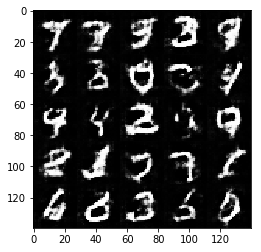

Epoch 1/2 Batch# 410... Discriminator Loss: 1.4233... Generator Loss: 0.7626
Epoch 1/2 Batch# 420... Discriminator Loss: 1.4192... Generator Loss: 0.7678
Epoch 1/2 Batch# 430... Discriminator Loss: 1.5774... Generator Loss: 0.5269
Epoch 1/2 Batch# 440... Discriminator Loss: 1.5290... Generator Loss: 0.5100
Epoch 1/2 Batch# 450... Discriminator Loss: 1.5211... Generator Loss: 0.7872
Epoch 1/2 Batch# 460... Discriminator Loss: 1.4898... Generator Loss: 0.7980
Epoch 1/2 Batch# 470... Discriminator Loss: 1.4589... Generator Loss: 0.8208
Epoch 1/2 Batch# 480... Discriminator Loss: 1.5560... Generator Loss: 0.9138
Epoch 1/2 Batch# 490... Discriminator Loss: 1.5055... Generator Loss: 0.5763
Epoch 1/2 Batch# 500... Discriminator Loss: 1.5485... Generator Loss: 0.8165


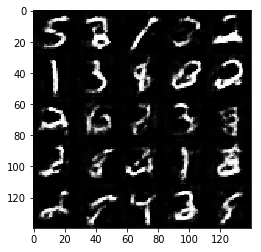

Epoch 1/2 Batch# 510... Discriminator Loss: 1.4712... Generator Loss: 0.7701
Epoch 1/2 Batch# 520... Discriminator Loss: 1.4382... Generator Loss: 0.7107
Epoch 1/2 Batch# 530... Discriminator Loss: 1.4891... Generator Loss: 0.9032
Epoch 1/2 Batch# 540... Discriminator Loss: 1.4264... Generator Loss: 0.6605
Epoch 1/2 Batch# 550... Discriminator Loss: 1.5487... Generator Loss: 0.7501
Epoch 1/2 Batch# 560... Discriminator Loss: 1.6270... Generator Loss: 0.4673
Epoch 1/2 Batch# 570... Discriminator Loss: 1.4954... Generator Loss: 0.7187
Epoch 1/2 Batch# 580... Discriminator Loss: 1.4105... Generator Loss: 0.7865
Epoch 1/2 Batch# 590... Discriminator Loss: 1.4326... Generator Loss: 0.8549
Epoch 1/2 Batch# 600... Discriminator Loss: 1.5783... Generator Loss: 1.2535


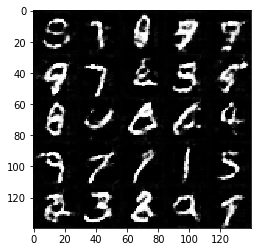

Epoch 1/2 Batch# 610... Discriminator Loss: 1.4629... Generator Loss: 0.5602
Epoch 1/2 Batch# 620... Discriminator Loss: 1.5042... Generator Loss: 0.5642
Epoch 1/2 Batch# 630... Discriminator Loss: 1.3709... Generator Loss: 0.7667
Epoch 1/2 Batch# 640... Discriminator Loss: 1.3572... Generator Loss: 0.8272
Epoch 1/2 Batch# 650... Discriminator Loss: 1.6120... Generator Loss: 0.4783
Epoch 1/2 Batch# 660... Discriminator Loss: 1.5139... Generator Loss: 0.4771
Epoch 1/2 Batch# 670... Discriminator Loss: 1.4398... Generator Loss: 0.8246
Epoch 1/2 Batch# 680... Discriminator Loss: 1.4202... Generator Loss: 0.6060
Epoch 1/2 Batch# 690... Discriminator Loss: 1.9450... Generator Loss: 0.2471
Epoch 1/2 Batch# 700... Discriminator Loss: 1.4691... Generator Loss: 0.7097


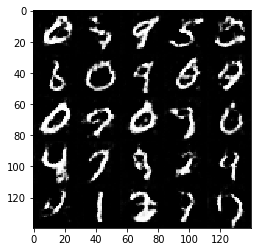

Epoch 1/2 Batch# 710... Discriminator Loss: 1.5982... Generator Loss: 0.4233
Epoch 1/2 Batch# 720... Discriminator Loss: 1.3230... Generator Loss: 0.8414
Epoch 1/2 Batch# 730... Discriminator Loss: 1.7399... Generator Loss: 0.3207
Epoch 1/2 Batch# 740... Discriminator Loss: 1.4765... Generator Loss: 0.5945
Epoch 1/2 Batch# 750... Discriminator Loss: 1.4611... Generator Loss: 0.9178
Epoch 1/2 Batch# 760... Discriminator Loss: 1.3836... Generator Loss: 0.7572
Epoch 1/2 Batch# 770... Discriminator Loss: 1.7993... Generator Loss: 0.2901
Epoch 1/2 Batch# 780... Discriminator Loss: 1.4858... Generator Loss: 0.6408
Epoch 1/2 Batch# 790... Discriminator Loss: 1.7554... Generator Loss: 0.3204
Epoch 1/2 Batch# 800... Discriminator Loss: 1.3800... Generator Loss: 0.6512


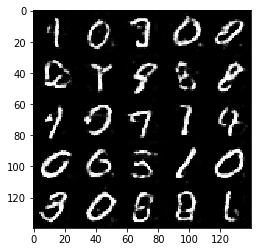

Epoch 1/2 Batch# 810... Discriminator Loss: 1.5085... Generator Loss: 0.4781
Epoch 1/2 Batch# 820... Discriminator Loss: 1.3964... Generator Loss: 0.6444
Epoch 1/2 Batch# 830... Discriminator Loss: 2.4774... Generator Loss: 1.9223
Epoch 1/2 Batch# 840... Discriminator Loss: 1.4155... Generator Loss: 0.5965
Epoch 1/2 Batch# 850... Discriminator Loss: 1.4196... Generator Loss: 0.6046
Epoch 1/2 Batch# 860... Discriminator Loss: 1.3375... Generator Loss: 0.7304
Epoch 1/2 Batch# 870... Discriminator Loss: 1.3179... Generator Loss: 1.0609
Epoch 1/2 Batch# 880... Discriminator Loss: 1.3939... Generator Loss: 0.9673
Epoch 1/2 Batch# 890... Discriminator Loss: 1.4829... Generator Loss: 0.4943
Epoch 1/2 Batch# 900... Discriminator Loss: 2.4924... Generator Loss: 1.9700


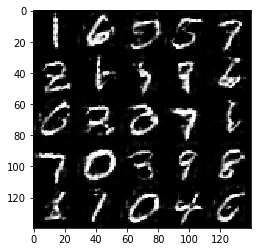

Epoch 1/2 Batch# 910... Discriminator Loss: 1.3629... Generator Loss: 0.7315
Epoch 1/2 Batch# 920... Discriminator Loss: 1.4124... Generator Loss: 0.7088
Epoch 1/2 Batch# 930... Discriminator Loss: 1.3809... Generator Loss: 0.6866
Epoch 2/2 Batch# 940... Discriminator Loss: 1.4404... Generator Loss: 0.6176
Epoch 2/2 Batch# 950... Discriminator Loss: 1.6183... Generator Loss: 1.3947
Epoch 2/2 Batch# 960... Discriminator Loss: 1.4152... Generator Loss: 0.5717
Epoch 2/2 Batch# 970... Discriminator Loss: 1.7380... Generator Loss: 0.6356
Epoch 2/2 Batch# 980... Discriminator Loss: 1.5568... Generator Loss: 0.4952
Epoch 2/2 Batch# 990... Discriminator Loss: 1.3975... Generator Loss: 0.6310
Epoch 2/2 Batch# 1000... Discriminator Loss: 1.3822... Generator Loss: 0.6570


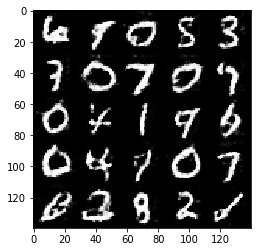

Epoch 2/2 Batch# 1010... Discriminator Loss: 1.5034... Generator Loss: 0.4952
Epoch 2/2 Batch# 1020... Discriminator Loss: 2.1763... Generator Loss: 0.1885
Epoch 2/2 Batch# 1030... Discriminator Loss: 1.3912... Generator Loss: 0.7282
Epoch 2/2 Batch# 1040... Discriminator Loss: 1.6600... Generator Loss: 0.3599
Epoch 2/2 Batch# 1050... Discriminator Loss: 1.3859... Generator Loss: 0.8755
Epoch 2/2 Batch# 1060... Discriminator Loss: 1.6446... Generator Loss: 1.1536
Epoch 2/2 Batch# 1070... Discriminator Loss: 1.2866... Generator Loss: 0.7795
Epoch 2/2 Batch# 1080... Discriminator Loss: 1.3724... Generator Loss: 0.5798
Epoch 2/2 Batch# 1090... Discriminator Loss: 2.2301... Generator Loss: 0.1732
Epoch 2/2 Batch# 1100... Discriminator Loss: 1.4849... Generator Loss: 0.5188


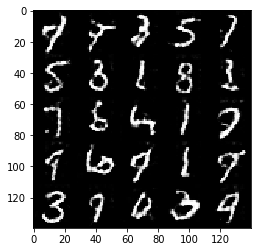

Epoch 2/2 Batch# 1110... Discriminator Loss: 2.2457... Generator Loss: 0.1722
Epoch 2/2 Batch# 1120... Discriminator Loss: 1.3256... Generator Loss: 0.6972
Epoch 2/2 Batch# 1130... Discriminator Loss: 1.4852... Generator Loss: 0.4442
Epoch 2/2 Batch# 1140... Discriminator Loss: 1.4867... Generator Loss: 0.8128
Epoch 2/2 Batch# 1150... Discriminator Loss: 1.3642... Generator Loss: 0.5976
Epoch 2/2 Batch# 1160... Discriminator Loss: 1.6192... Generator Loss: 0.4026
Epoch 2/2 Batch# 1170... Discriminator Loss: 1.3923... Generator Loss: 0.6172
Epoch 2/2 Batch# 1180... Discriminator Loss: 1.3746... Generator Loss: 0.6461
Epoch 2/2 Batch# 1190... Discriminator Loss: 1.9723... Generator Loss: 0.2358
Epoch 2/2 Batch# 1200... Discriminator Loss: 1.2992... Generator Loss: 0.6925


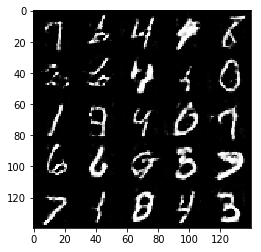

Epoch 2/2 Batch# 1210... Discriminator Loss: 1.3652... Generator Loss: 0.8735
Epoch 2/2 Batch# 1220... Discriminator Loss: 1.3683... Generator Loss: 0.6221
Epoch 2/2 Batch# 1230... Discriminator Loss: 1.3230... Generator Loss: 0.7534
Epoch 2/2 Batch# 1240... Discriminator Loss: 1.3863... Generator Loss: 0.6484
Epoch 2/2 Batch# 1250... Discriminator Loss: 1.6922... Generator Loss: 0.3393
Epoch 2/2 Batch# 1260... Discriminator Loss: 1.4248... Generator Loss: 0.5064
Epoch 2/2 Batch# 1270... Discriminator Loss: 1.8872... Generator Loss: 0.2638
Epoch 2/2 Batch# 1280... Discriminator Loss: 1.4427... Generator Loss: 0.7205
Epoch 2/2 Batch# 1290... Discriminator Loss: 1.4442... Generator Loss: 0.5341
Epoch 2/2 Batch# 1300... Discriminator Loss: 1.3419... Generator Loss: 0.8017


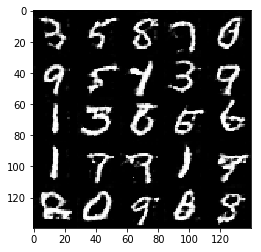

Epoch 2/2 Batch# 1310... Discriminator Loss: 1.5043... Generator Loss: 0.4748
Epoch 2/2 Batch# 1320... Discriminator Loss: 1.5877... Generator Loss: 0.6228
Epoch 2/2 Batch# 1330... Discriminator Loss: 1.2636... Generator Loss: 0.7338
Epoch 2/2 Batch# 1340... Discriminator Loss: 1.3827... Generator Loss: 0.9021
Epoch 2/2 Batch# 1350... Discriminator Loss: 1.4261... Generator Loss: 0.4937
Epoch 2/2 Batch# 1360... Discriminator Loss: 1.5376... Generator Loss: 0.4120
Epoch 2/2 Batch# 1370... Discriminator Loss: 1.2821... Generator Loss: 1.3209
Epoch 2/2 Batch# 1380... Discriminator Loss: 1.5200... Generator Loss: 0.4286
Epoch 2/2 Batch# 1390... Discriminator Loss: 1.4480... Generator Loss: 0.7665
Epoch 2/2 Batch# 1400... Discriminator Loss: 1.4278... Generator Loss: 0.4937


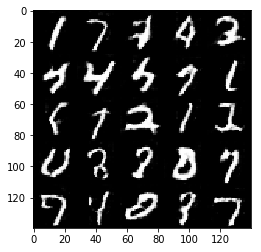

Epoch 2/2 Batch# 1410... Discriminator Loss: 1.2443... Generator Loss: 0.9980
Epoch 2/2 Batch# 1420... Discriminator Loss: 1.4288... Generator Loss: 0.5769
Epoch 2/2 Batch# 1430... Discriminator Loss: 1.4900... Generator Loss: 0.4879
Epoch 2/2 Batch# 1440... Discriminator Loss: 1.4987... Generator Loss: 0.4862
Epoch 2/2 Batch# 1450... Discriminator Loss: 1.5132... Generator Loss: 0.4640
Epoch 2/2 Batch# 1460... Discriminator Loss: 1.2834... Generator Loss: 0.5815
Epoch 2/2 Batch# 1470... Discriminator Loss: 1.5198... Generator Loss: 0.4322
Epoch 2/2 Batch# 1480... Discriminator Loss: 1.4859... Generator Loss: 0.4583
Epoch 2/2 Batch# 1490... Discriminator Loss: 1.3607... Generator Loss: 0.7196
Epoch 2/2 Batch# 1500... Discriminator Loss: 1.4898... Generator Loss: 0.9485


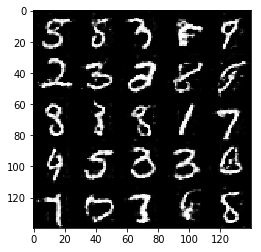

Epoch 2/2 Batch# 1510... Discriminator Loss: 1.2207... Generator Loss: 0.8338
Epoch 2/2 Batch# 1520... Discriminator Loss: 1.4014... Generator Loss: 0.5570
Epoch 2/2 Batch# 1530... Discriminator Loss: 1.2197... Generator Loss: 0.9942
Epoch 2/2 Batch# 1540... Discriminator Loss: 1.3134... Generator Loss: 0.7040
Epoch 2/2 Batch# 1550... Discriminator Loss: 1.4783... Generator Loss: 0.5305
Epoch 2/2 Batch# 1560... Discriminator Loss: 1.3259... Generator Loss: 0.6063
Epoch 2/2 Batch# 1570... Discriminator Loss: 1.6122... Generator Loss: 0.3849
Epoch 2/2 Batch# 1580... Discriminator Loss: 1.4924... Generator Loss: 0.5111
Epoch 2/2 Batch# 1590... Discriminator Loss: 1.3900... Generator Loss: 1.0008
Epoch 2/2 Batch# 1600... Discriminator Loss: 1.3067... Generator Loss: 0.7252


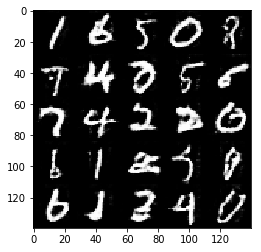

Epoch 2/2 Batch# 1610... Discriminator Loss: 1.4980... Generator Loss: 0.4456
Epoch 2/2 Batch# 1620... Discriminator Loss: 1.3383... Generator Loss: 0.6504
Epoch 2/2 Batch# 1630... Discriminator Loss: 1.5099... Generator Loss: 0.4546
Epoch 2/2 Batch# 1640... Discriminator Loss: 1.2607... Generator Loss: 1.1778
Epoch 2/2 Batch# 1650... Discriminator Loss: 1.4699... Generator Loss: 0.6246
Epoch 2/2 Batch# 1660... Discriminator Loss: 1.3626... Generator Loss: 0.5548
Epoch 2/2 Batch# 1670... Discriminator Loss: 1.3597... Generator Loss: 0.5947
Epoch 2/2 Batch# 1680... Discriminator Loss: 1.3748... Generator Loss: 1.2751
Epoch 2/2 Batch# 1690... Discriminator Loss: 1.8633... Generator Loss: 0.2975
Epoch 2/2 Batch# 1700... Discriminator Loss: 1.2923... Generator Loss: 0.8000


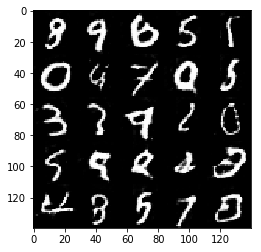

Epoch 2/2 Batch# 1710... Discriminator Loss: 1.2722... Generator Loss: 1.2366
Epoch 2/2 Batch# 1720... Discriminator Loss: 1.5525... Generator Loss: 1.3270
Epoch 2/2 Batch# 1730... Discriminator Loss: 1.2707... Generator Loss: 0.8726
Epoch 2/2 Batch# 1740... Discriminator Loss: 1.2847... Generator Loss: 0.7552
Epoch 2/2 Batch# 1750... Discriminator Loss: 1.5061... Generator Loss: 0.4312
Epoch 2/2 Batch# 1760... Discriminator Loss: 1.3839... Generator Loss: 0.7448
Epoch 2/2 Batch# 1770... Discriminator Loss: 1.2491... Generator Loss: 0.6169
Epoch 2/2 Batch# 1780... Discriminator Loss: 1.5362... Generator Loss: 1.0752
Epoch 2/2 Batch# 1790... Discriminator Loss: 1.4541... Generator Loss: 0.5242
Epoch 2/2 Batch# 1800... Discriminator Loss: 1.3215... Generator Loss: 0.8546


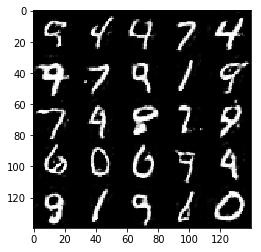

Epoch 2/2 Batch# 1810... Discriminator Loss: 1.3036... Generator Loss: 0.7569
Epoch 2/2 Batch# 1820... Discriminator Loss: 1.2281... Generator Loss: 0.9884
Epoch 2/2 Batch# 1830... Discriminator Loss: 1.7233... Generator Loss: 0.3322
Epoch 2/2 Batch# 1840... Discriminator Loss: 1.5949... Generator Loss: 0.3751
Epoch 2/2 Batch# 1850... Discriminator Loss: 1.2914... Generator Loss: 0.8233
Epoch 2/2 Batch# 1860... Discriminator Loss: 1.6141... Generator Loss: 0.3817
Epoch 2/2 Batch# 1870... Discriminator Loss: 1.9289... Generator Loss: 0.2676
END


In [19]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 Batch# 10... Discriminator Loss: 5.7444... Generator Loss: 0.0266
Epoch 1/1 Batch# 20... Discriminator Loss: 4.9159... Generator Loss: 0.0257
Epoch 1/1 Batch# 30... Discriminator Loss: 2.9185... Generator Loss: 0.2464
Epoch 1/1 Batch# 40... Discriminator Loss: 3.4376... Generator Loss: 0.1089
Epoch 1/1 Batch# 50... Discriminator Loss: 2.7260... Generator Loss: 0.5602
Epoch 1/1 Batch# 60... Discriminator Loss: 2.6351... Generator Loss: 0.3769
Epoch 1/1 Batch# 70... Discriminator Loss: 2.5575... Generator Loss: 0.4626
Epoch 1/1 Batch# 80... Discriminator Loss: 1.9510... Generator Loss: 0.4471
Epoch 1/1 Batch# 90... Discriminator Loss: 1.2810... Generator Loss: 0.7394
Epoch 1/1 Batch# 100... Discriminator Loss: 1.2193... Generator Loss: 0.9263


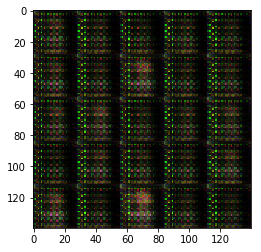

Epoch 1/1 Batch# 110... Discriminator Loss: 1.7175... Generator Loss: 0.8283
Epoch 1/1 Batch# 120... Discriminator Loss: 2.1687... Generator Loss: 0.6806
Epoch 1/1 Batch# 130... Discriminator Loss: 1.8555... Generator Loss: 0.7347
Epoch 1/1 Batch# 140... Discriminator Loss: 1.2923... Generator Loss: 0.8341
Epoch 1/1 Batch# 150... Discriminator Loss: 2.0194... Generator Loss: 0.4768
Epoch 1/1 Batch# 160... Discriminator Loss: 1.7958... Generator Loss: 0.5408
Epoch 1/1 Batch# 170... Discriminator Loss: 2.0774... Generator Loss: 0.7962
Epoch 1/1 Batch# 180... Discriminator Loss: 1.7647... Generator Loss: 0.5805
Epoch 1/1 Batch# 190... Discriminator Loss: 1.2708... Generator Loss: 0.9017
Epoch 1/1 Batch# 200... Discriminator Loss: 1.3869... Generator Loss: 0.8538


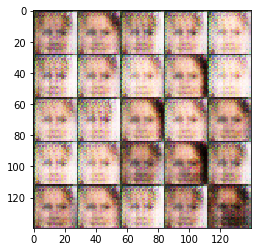

Epoch 1/1 Batch# 210... Discriminator Loss: 1.9389... Generator Loss: 0.5599
Epoch 1/1 Batch# 220... Discriminator Loss: 1.5962... Generator Loss: 0.7259
Epoch 1/1 Batch# 230... Discriminator Loss: 1.3423... Generator Loss: 1.0283
Epoch 1/1 Batch# 240... Discriminator Loss: 1.5763... Generator Loss: 0.6701
Epoch 1/1 Batch# 250... Discriminator Loss: 1.7986... Generator Loss: 0.6911
Epoch 1/1 Batch# 260... Discriminator Loss: 1.5291... Generator Loss: 0.7941
Epoch 1/1 Batch# 270... Discriminator Loss: 1.5078... Generator Loss: 0.8460
Epoch 1/1 Batch# 280... Discriminator Loss: 1.8905... Generator Loss: 0.5120
Epoch 1/1 Batch# 290... Discriminator Loss: 1.8241... Generator Loss: 0.5298
Epoch 1/1 Batch# 300... Discriminator Loss: 1.4669... Generator Loss: 0.6926


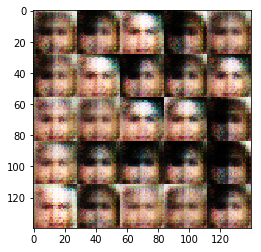

Epoch 1/1 Batch# 310... Discriminator Loss: 1.7142... Generator Loss: 0.5864
Epoch 1/1 Batch# 320... Discriminator Loss: 1.5139... Generator Loss: 0.7179
Epoch 1/1 Batch# 330... Discriminator Loss: 1.7497... Generator Loss: 0.5811
Epoch 1/1 Batch# 340... Discriminator Loss: 1.8138... Generator Loss: 0.5178
Epoch 1/1 Batch# 350... Discriminator Loss: 1.4719... Generator Loss: 0.7212
Epoch 1/1 Batch# 360... Discriminator Loss: 1.4929... Generator Loss: 0.7142
Epoch 1/1 Batch# 370... Discriminator Loss: 1.4919... Generator Loss: 0.6589
Epoch 1/1 Batch# 380... Discriminator Loss: 1.3529... Generator Loss: 0.7626
Epoch 1/1 Batch# 390... Discriminator Loss: 1.5119... Generator Loss: 0.7196
Epoch 1/1 Batch# 400... Discriminator Loss: 1.6678... Generator Loss: 0.6339


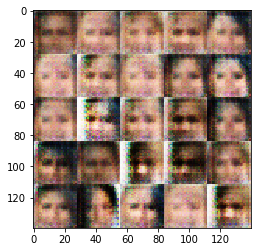

Epoch 1/1 Batch# 410... Discriminator Loss: 1.5605... Generator Loss: 0.6374
Epoch 1/1 Batch# 420... Discriminator Loss: 1.5362... Generator Loss: 0.6286
Epoch 1/1 Batch# 430... Discriminator Loss: 1.5535... Generator Loss: 0.7233
Epoch 1/1 Batch# 440... Discriminator Loss: 1.5294... Generator Loss: 0.7555
Epoch 1/1 Batch# 450... Discriminator Loss: 1.7745... Generator Loss: 0.5537
Epoch 1/1 Batch# 460... Discriminator Loss: 1.6104... Generator Loss: 0.6554
Epoch 1/1 Batch# 470... Discriminator Loss: 1.4187... Generator Loss: 0.7345
Epoch 1/1 Batch# 480... Discriminator Loss: 1.6068... Generator Loss: 0.6924
Epoch 1/1 Batch# 490... Discriminator Loss: 1.5544... Generator Loss: 0.7640
Epoch 1/1 Batch# 500... Discriminator Loss: 1.5285... Generator Loss: 0.6931


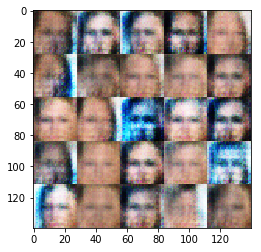

Epoch 1/1 Batch# 510... Discriminator Loss: 1.5504... Generator Loss: 0.6835
Epoch 1/1 Batch# 520... Discriminator Loss: 1.4440... Generator Loss: 0.7113
Epoch 1/1 Batch# 530... Discriminator Loss: 1.4785... Generator Loss: 0.7590
Epoch 1/1 Batch# 540... Discriminator Loss: 1.4501... Generator Loss: 0.7208
Epoch 1/1 Batch# 550... Discriminator Loss: 1.5539... Generator Loss: 0.6753
Epoch 1/1 Batch# 560... Discriminator Loss: 1.4544... Generator Loss: 0.7385
Epoch 1/1 Batch# 570... Discriminator Loss: 1.5230... Generator Loss: 0.6533
Epoch 1/1 Batch# 580... Discriminator Loss: 1.5092... Generator Loss: 0.6911
Epoch 1/1 Batch# 590... Discriminator Loss: 1.5714... Generator Loss: 0.7260
Epoch 1/1 Batch# 600... Discriminator Loss: 1.3942... Generator Loss: 0.7465


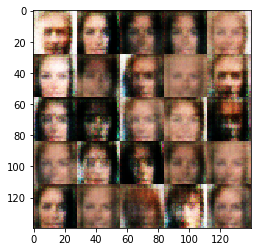

Epoch 1/1 Batch# 610... Discriminator Loss: 1.4458... Generator Loss: 0.6968
Epoch 1/1 Batch# 620... Discriminator Loss: 1.5626... Generator Loss: 0.7051
Epoch 1/1 Batch# 630... Discriminator Loss: 1.5382... Generator Loss: 0.7382
Epoch 1/1 Batch# 640... Discriminator Loss: 1.4045... Generator Loss: 0.8002
Epoch 1/1 Batch# 650... Discriminator Loss: 1.6528... Generator Loss: 0.5781
Epoch 1/1 Batch# 660... Discriminator Loss: 1.5191... Generator Loss: 0.7425
Epoch 1/1 Batch# 670... Discriminator Loss: 1.4885... Generator Loss: 0.7128
Epoch 1/1 Batch# 680... Discriminator Loss: 1.4897... Generator Loss: 0.7194
Epoch 1/1 Batch# 690... Discriminator Loss: 1.5440... Generator Loss: 0.6207
Epoch 1/1 Batch# 700... Discriminator Loss: 1.4497... Generator Loss: 0.8012


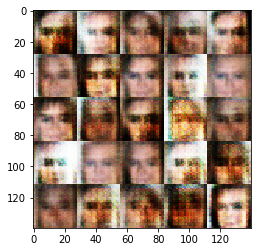

Epoch 1/1 Batch# 710... Discriminator Loss: 1.5557... Generator Loss: 0.7277
Epoch 1/1 Batch# 720... Discriminator Loss: 1.5545... Generator Loss: 0.6802
Epoch 1/1 Batch# 730... Discriminator Loss: 1.5032... Generator Loss: 0.6973
Epoch 1/1 Batch# 740... Discriminator Loss: 1.5064... Generator Loss: 0.6538
Epoch 1/1 Batch# 750... Discriminator Loss: 1.5256... Generator Loss: 0.7335
Epoch 1/1 Batch# 760... Discriminator Loss: 1.4750... Generator Loss: 0.6997
Epoch 1/1 Batch# 770... Discriminator Loss: 1.4134... Generator Loss: 0.7829
Epoch 1/1 Batch# 780... Discriminator Loss: 1.5382... Generator Loss: 0.6928
Epoch 1/1 Batch# 790... Discriminator Loss: 1.4915... Generator Loss: 0.6964
Epoch 1/1 Batch# 800... Discriminator Loss: 1.4871... Generator Loss: 0.7433


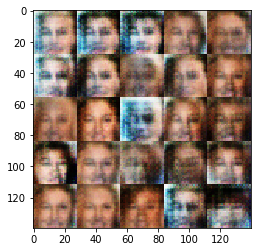

Epoch 1/1 Batch# 810... Discriminator Loss: 1.3947... Generator Loss: 0.7977
Epoch 1/1 Batch# 820... Discriminator Loss: 1.4024... Generator Loss: 0.8081
Epoch 1/1 Batch# 830... Discriminator Loss: 1.3912... Generator Loss: 0.8276
Epoch 1/1 Batch# 840... Discriminator Loss: 1.5111... Generator Loss: 0.7629
Epoch 1/1 Batch# 850... Discriminator Loss: 1.5053... Generator Loss: 0.6526
Epoch 1/1 Batch# 860... Discriminator Loss: 1.4580... Generator Loss: 0.7127
Epoch 1/1 Batch# 870... Discriminator Loss: 1.4689... Generator Loss: 0.6964
Epoch 1/1 Batch# 880... Discriminator Loss: 1.5665... Generator Loss: 0.6613
Epoch 1/1 Batch# 890... Discriminator Loss: 1.5056... Generator Loss: 0.7311
Epoch 1/1 Batch# 900... Discriminator Loss: 1.4579... Generator Loss: 0.7401


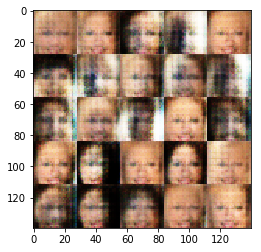

Epoch 1/1 Batch# 910... Discriminator Loss: 1.4074... Generator Loss: 0.7657
Epoch 1/1 Batch# 920... Discriminator Loss: 1.4083... Generator Loss: 0.7422
Epoch 1/1 Batch# 930... Discriminator Loss: 1.4193... Generator Loss: 0.6890
Epoch 1/1 Batch# 940... Discriminator Loss: 1.4129... Generator Loss: 0.8359
Epoch 1/1 Batch# 950... Discriminator Loss: 1.4113... Generator Loss: 0.7215
Epoch 1/1 Batch# 960... Discriminator Loss: 1.4153... Generator Loss: 0.7913
Epoch 1/1 Batch# 970... Discriminator Loss: 1.4851... Generator Loss: 0.7862
Epoch 1/1 Batch# 980... Discriminator Loss: 1.5259... Generator Loss: 0.8110
Epoch 1/1 Batch# 990... Discriminator Loss: 1.4417... Generator Loss: 0.7451
Epoch 1/1 Batch# 1000... Discriminator Loss: 1.4999... Generator Loss: 0.8102


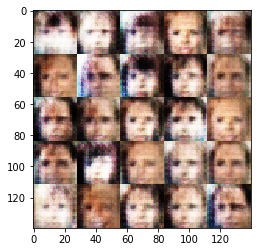

Epoch 1/1 Batch# 1010... Discriminator Loss: 1.5109... Generator Loss: 0.6521
Epoch 1/1 Batch# 1020... Discriminator Loss: 1.5214... Generator Loss: 0.7082
Epoch 1/1 Batch# 1030... Discriminator Loss: 1.4108... Generator Loss: 0.7723
Epoch 1/1 Batch# 1040... Discriminator Loss: 1.4819... Generator Loss: 0.6845
Epoch 1/1 Batch# 1050... Discriminator Loss: 1.4889... Generator Loss: 0.7187
Epoch 1/1 Batch# 1060... Discriminator Loss: 1.3504... Generator Loss: 0.8694
Epoch 1/1 Batch# 1070... Discriminator Loss: 1.4018... Generator Loss: 0.7657
Epoch 1/1 Batch# 1080... Discriminator Loss: 1.5209... Generator Loss: 0.7986
Epoch 1/1 Batch# 1090... Discriminator Loss: 1.3840... Generator Loss: 0.8101
Epoch 1/1 Batch# 1100... Discriminator Loss: 1.5055... Generator Loss: 0.7161


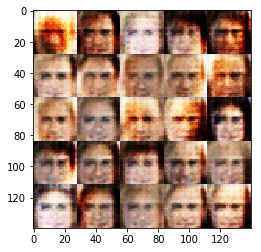

Epoch 1/1 Batch# 1110... Discriminator Loss: 1.4935... Generator Loss: 0.7472
Epoch 1/1 Batch# 1120... Discriminator Loss: 1.3528... Generator Loss: 0.7518
Epoch 1/1 Batch# 1130... Discriminator Loss: 1.4325... Generator Loss: 0.7236
Epoch 1/1 Batch# 1140... Discriminator Loss: 1.5104... Generator Loss: 0.7728
Epoch 1/1 Batch# 1150... Discriminator Loss: 1.5036... Generator Loss: 0.6730
Epoch 1/1 Batch# 1160... Discriminator Loss: 1.4485... Generator Loss: 0.7339
Epoch 1/1 Batch# 1170... Discriminator Loss: 1.4376... Generator Loss: 0.7561
Epoch 1/1 Batch# 1180... Discriminator Loss: 1.5066... Generator Loss: 0.6987
Epoch 1/1 Batch# 1190... Discriminator Loss: 1.4932... Generator Loss: 0.7181
Epoch 1/1 Batch# 1200... Discriminator Loss: 1.5808... Generator Loss: 0.6966


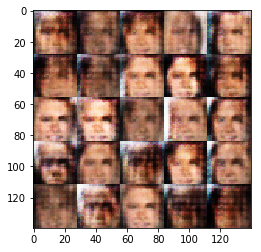

Epoch 1/1 Batch# 1210... Discriminator Loss: 1.4799... Generator Loss: 0.6761
Epoch 1/1 Batch# 1220... Discriminator Loss: 1.4336... Generator Loss: 0.7136
Epoch 1/1 Batch# 1230... Discriminator Loss: 1.3549... Generator Loss: 0.7719
Epoch 1/1 Batch# 1240... Discriminator Loss: 1.4104... Generator Loss: 0.7186
Epoch 1/1 Batch# 1250... Discriminator Loss: 1.4603... Generator Loss: 0.7476
Epoch 1/1 Batch# 1260... Discriminator Loss: 1.4543... Generator Loss: 0.7243
Epoch 1/1 Batch# 1270... Discriminator Loss: 1.4486... Generator Loss: 0.7811
Epoch 1/1 Batch# 1280... Discriminator Loss: 1.4081... Generator Loss: 0.7583
Epoch 1/1 Batch# 1290... Discriminator Loss: 1.4455... Generator Loss: 0.7556
Epoch 1/1 Batch# 1300... Discriminator Loss: 1.4521... Generator Loss: 0.7217


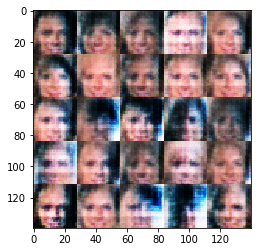

Epoch 1/1 Batch# 1310... Discriminator Loss: 1.4771... Generator Loss: 0.7643
Epoch 1/1 Batch# 1320... Discriminator Loss: 1.3895... Generator Loss: 0.7551
Epoch 1/1 Batch# 1330... Discriminator Loss: 1.4562... Generator Loss: 0.7834
Epoch 1/1 Batch# 1340... Discriminator Loss: 1.4895... Generator Loss: 0.7597
Epoch 1/1 Batch# 1350... Discriminator Loss: 1.4458... Generator Loss: 0.7370
Epoch 1/1 Batch# 1360... Discriminator Loss: 1.5061... Generator Loss: 0.7556
Epoch 1/1 Batch# 1370... Discriminator Loss: 1.6498... Generator Loss: 0.8233
Epoch 1/1 Batch# 1380... Discriminator Loss: 1.4765... Generator Loss: 0.7925
Epoch 1/1 Batch# 1390... Discriminator Loss: 1.5385... Generator Loss: 0.7739
Epoch 1/1 Batch# 1400... Discriminator Loss: 1.3856... Generator Loss: 0.7900


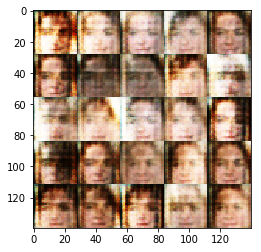

Epoch 1/1 Batch# 1410... Discriminator Loss: 1.4940... Generator Loss: 0.7381
Epoch 1/1 Batch# 1420... Discriminator Loss: 1.4558... Generator Loss: 0.7945
Epoch 1/1 Batch# 1430... Discriminator Loss: 1.4915... Generator Loss: 0.7531
Epoch 1/1 Batch# 1440... Discriminator Loss: 1.4830... Generator Loss: 0.7509
Epoch 1/1 Batch# 1450... Discriminator Loss: 1.4872... Generator Loss: 0.8678
Epoch 1/1 Batch# 1460... Discriminator Loss: 1.5439... Generator Loss: 0.8143
Epoch 1/1 Batch# 1470... Discriminator Loss: 1.4780... Generator Loss: 0.7498
Epoch 1/1 Batch# 1480... Discriminator Loss: 1.5596... Generator Loss: 0.6190
Epoch 1/1 Batch# 1490... Discriminator Loss: 1.4662... Generator Loss: 0.7275
Epoch 1/1 Batch# 1500... Discriminator Loss: 1.4440... Generator Loss: 0.8136


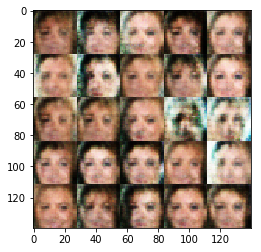

Epoch 1/1 Batch# 1510... Discriminator Loss: 1.3511... Generator Loss: 0.7439
Epoch 1/1 Batch# 1520... Discriminator Loss: 1.4398... Generator Loss: 0.8428
Epoch 1/1 Batch# 1530... Discriminator Loss: 1.4868... Generator Loss: 0.6774
Epoch 1/1 Batch# 1540... Discriminator Loss: 1.4810... Generator Loss: 0.7614
Epoch 1/1 Batch# 1550... Discriminator Loss: 1.4904... Generator Loss: 0.7339
Epoch 1/1 Batch# 1560... Discriminator Loss: 1.4348... Generator Loss: 0.7482
Epoch 1/1 Batch# 1570... Discriminator Loss: 1.4373... Generator Loss: 0.7398
Epoch 1/1 Batch# 1580... Discriminator Loss: 1.4823... Generator Loss: 0.7564
Epoch 1/1 Batch# 1590... Discriminator Loss: 1.4160... Generator Loss: 0.7008
Epoch 1/1 Batch# 1600... Discriminator Loss: 1.4310... Generator Loss: 0.6951


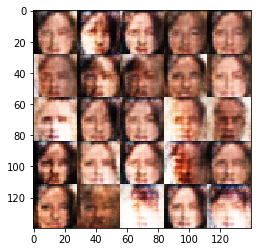

Epoch 1/1 Batch# 1610... Discriminator Loss: 1.4501... Generator Loss: 0.7211
Epoch 1/1 Batch# 1620... Discriminator Loss: 1.3790... Generator Loss: 0.7541
Epoch 1/1 Batch# 1630... Discriminator Loss: 1.4156... Generator Loss: 0.6868
Epoch 1/1 Batch# 1640... Discriminator Loss: 1.4516... Generator Loss: 0.8037
Epoch 1/1 Batch# 1650... Discriminator Loss: 1.3636... Generator Loss: 0.7720
Epoch 1/1 Batch# 1660... Discriminator Loss: 1.4447... Generator Loss: 0.9058
Epoch 1/1 Batch# 1670... Discriminator Loss: 1.4242... Generator Loss: 0.7644
Epoch 1/1 Batch# 1680... Discriminator Loss: 1.4503... Generator Loss: 0.7947
Epoch 1/1 Batch# 1690... Discriminator Loss: 1.4624... Generator Loss: 0.7798
Epoch 1/1 Batch# 1700... Discriminator Loss: 1.5097... Generator Loss: 0.6864


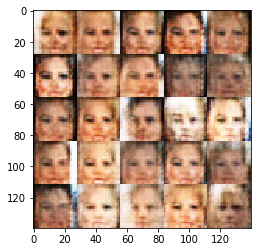

Epoch 1/1 Batch# 1710... Discriminator Loss: 1.4055... Generator Loss: 0.8283
Epoch 1/1 Batch# 1720... Discriminator Loss: 1.4263... Generator Loss: 0.8153
Epoch 1/1 Batch# 1730... Discriminator Loss: 1.3717... Generator Loss: 0.7900
Epoch 1/1 Batch# 1740... Discriminator Loss: 1.4032... Generator Loss: 0.7647
Epoch 1/1 Batch# 1750... Discriminator Loss: 1.5054... Generator Loss: 0.6863
Epoch 1/1 Batch# 1760... Discriminator Loss: 1.4367... Generator Loss: 0.7438
Epoch 1/1 Batch# 1770... Discriminator Loss: 1.4589... Generator Loss: 0.7306
Epoch 1/1 Batch# 1780... Discriminator Loss: 1.4108... Generator Loss: 0.7414
Epoch 1/1 Batch# 1790... Discriminator Loss: 1.3655... Generator Loss: 0.7653
Epoch 1/1 Batch# 1800... Discriminator Loss: 1.4195... Generator Loss: 0.7741


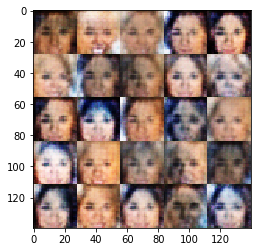

Epoch 1/1 Batch# 1810... Discriminator Loss: 1.4506... Generator Loss: 0.8467
Epoch 1/1 Batch# 1820... Discriminator Loss: 1.4254... Generator Loss: 0.8671
Epoch 1/1 Batch# 1830... Discriminator Loss: 1.4295... Generator Loss: 0.7922
Epoch 1/1 Batch# 1840... Discriminator Loss: 1.4647... Generator Loss: 0.7423
Epoch 1/1 Batch# 1850... Discriminator Loss: 1.4377... Generator Loss: 0.6981
Epoch 1/1 Batch# 1860... Discriminator Loss: 1.5305... Generator Loss: 0.6290
Epoch 1/1 Batch# 1870... Discriminator Loss: 1.4838... Generator Loss: 0.7463
Epoch 1/1 Batch# 1880... Discriminator Loss: 1.3876... Generator Loss: 0.7750
Epoch 1/1 Batch# 1890... Discriminator Loss: 1.4331... Generator Loss: 0.7530
Epoch 1/1 Batch# 1900... Discriminator Loss: 1.4164... Generator Loss: 0.7912


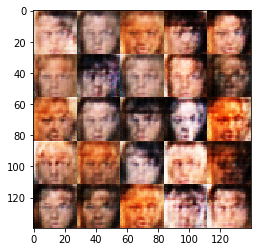

Epoch 1/1 Batch# 1910... Discriminator Loss: 1.4137... Generator Loss: 0.8333
Epoch 1/1 Batch# 1920... Discriminator Loss: 1.4447... Generator Loss: 0.7390
Epoch 1/1 Batch# 1930... Discriminator Loss: 1.4167... Generator Loss: 0.7006
Epoch 1/1 Batch# 1940... Discriminator Loss: 1.4007... Generator Loss: 0.7243
Epoch 1/1 Batch# 1950... Discriminator Loss: 1.4294... Generator Loss: 0.7653
Epoch 1/1 Batch# 1960... Discriminator Loss: 1.4605... Generator Loss: 0.7660
Epoch 1/1 Batch# 1970... Discriminator Loss: 1.4605... Generator Loss: 0.7157
Epoch 1/1 Batch# 1980... Discriminator Loss: 1.4754... Generator Loss: 0.7568
Epoch 1/1 Batch# 1990... Discriminator Loss: 1.4287... Generator Loss: 0.7821
Epoch 1/1 Batch# 2000... Discriminator Loss: 1.3881... Generator Loss: 0.7390


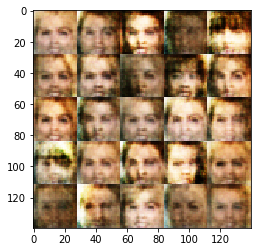

Epoch 1/1 Batch# 2010... Discriminator Loss: 1.5368... Generator Loss: 0.7226
Epoch 1/1 Batch# 2020... Discriminator Loss: 1.4914... Generator Loss: 0.7781
Epoch 1/1 Batch# 2030... Discriminator Loss: 1.4767... Generator Loss: 0.7338
Epoch 1/1 Batch# 2040... Discriminator Loss: 1.4546... Generator Loss: 0.7445
Epoch 1/1 Batch# 2050... Discriminator Loss: 1.4096... Generator Loss: 0.7341
Epoch 1/1 Batch# 2060... Discriminator Loss: 1.4286... Generator Loss: 0.8095
Epoch 1/1 Batch# 2070... Discriminator Loss: 1.4486... Generator Loss: 0.7726
Epoch 1/1 Batch# 2080... Discriminator Loss: 1.4743... Generator Loss: 0.8102
Epoch 1/1 Batch# 2090... Discriminator Loss: 1.5090... Generator Loss: 0.7467
Epoch 1/1 Batch# 2100... Discriminator Loss: 1.3988... Generator Loss: 0.7419


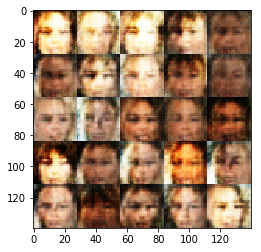

Epoch 1/1 Batch# 2110... Discriminator Loss: 1.4434... Generator Loss: 0.7578
Epoch 1/1 Batch# 2120... Discriminator Loss: 1.4560... Generator Loss: 0.7929
Epoch 1/1 Batch# 2130... Discriminator Loss: 1.4626... Generator Loss: 0.6676
Epoch 1/1 Batch# 2140... Discriminator Loss: 1.4363... Generator Loss: 0.7498
Epoch 1/1 Batch# 2150... Discriminator Loss: 1.4639... Generator Loss: 0.7886
Epoch 1/1 Batch# 2160... Discriminator Loss: 1.3918... Generator Loss: 0.8244
Epoch 1/1 Batch# 2170... Discriminator Loss: 1.3988... Generator Loss: 0.7873
Epoch 1/1 Batch# 2180... Discriminator Loss: 1.4333... Generator Loss: 0.7148
Epoch 1/1 Batch# 2190... Discriminator Loss: 1.4241... Generator Loss: 0.7591
Epoch 1/1 Batch# 2200... Discriminator Loss: 1.3756... Generator Loss: 0.7777


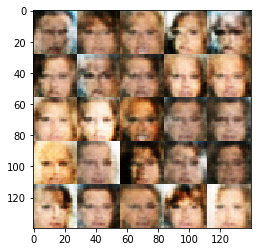

Epoch 1/1 Batch# 2210... Discriminator Loss: 1.4244... Generator Loss: 0.7922
Epoch 1/1 Batch# 2220... Discriminator Loss: 1.3914... Generator Loss: 0.7651
Epoch 1/1 Batch# 2230... Discriminator Loss: 1.4163... Generator Loss: 0.7703
Epoch 1/1 Batch# 2240... Discriminator Loss: 1.3974... Generator Loss: 0.7740
Epoch 1/1 Batch# 2250... Discriminator Loss: 1.4299... Generator Loss: 0.7051
Epoch 1/1 Batch# 2260... Discriminator Loss: 1.4043... Generator Loss: 0.8270
Epoch 1/1 Batch# 2270... Discriminator Loss: 1.4244... Generator Loss: 0.7377
Epoch 1/1 Batch# 2280... Discriminator Loss: 1.4583... Generator Loss: 0.7477
Epoch 1/1 Batch# 2290... Discriminator Loss: 1.4255... Generator Loss: 0.8037
Epoch 1/1 Batch# 2300... Discriminator Loss: 1.5203... Generator Loss: 0.6729


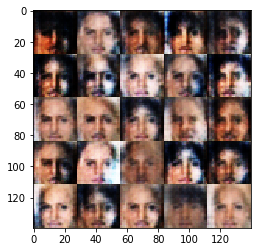

Epoch 1/1 Batch# 2310... Discriminator Loss: 1.4226... Generator Loss: 0.7748
Epoch 1/1 Batch# 2320... Discriminator Loss: 1.3670... Generator Loss: 0.8490
Epoch 1/1 Batch# 2330... Discriminator Loss: 1.4243... Generator Loss: 0.8471
Epoch 1/1 Batch# 2340... Discriminator Loss: 1.4176... Generator Loss: 0.8111
Epoch 1/1 Batch# 2350... Discriminator Loss: 1.3954... Generator Loss: 0.8054
Epoch 1/1 Batch# 2360... Discriminator Loss: 1.4196... Generator Loss: 0.8006
Epoch 1/1 Batch# 2370... Discriminator Loss: 1.4294... Generator Loss: 0.7470
Epoch 1/1 Batch# 2380... Discriminator Loss: 1.4350... Generator Loss: 0.6880
Epoch 1/1 Batch# 2390... Discriminator Loss: 1.4761... Generator Loss: 0.7431
Epoch 1/1 Batch# 2400... Discriminator Loss: 1.4378... Generator Loss: 0.8061


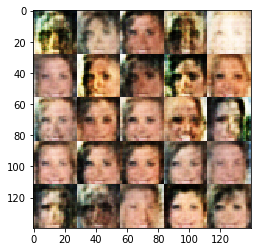

Epoch 1/1 Batch# 2410... Discriminator Loss: 1.4980... Generator Loss: 0.7302
Epoch 1/1 Batch# 2420... Discriminator Loss: 1.4103... Generator Loss: 0.7529
Epoch 1/1 Batch# 2430... Discriminator Loss: 1.3933... Generator Loss: 0.7810
Epoch 1/1 Batch# 2440... Discriminator Loss: 1.4214... Generator Loss: 0.7950
Epoch 1/1 Batch# 2450... Discriminator Loss: 1.3976... Generator Loss: 0.7658
Epoch 1/1 Batch# 2460... Discriminator Loss: 1.4045... Generator Loss: 0.8038
Epoch 1/1 Batch# 2470... Discriminator Loss: 1.4962... Generator Loss: 0.6770
Epoch 1/1 Batch# 2480... Discriminator Loss: 1.4412... Generator Loss: 0.7675
Epoch 1/1 Batch# 2490... Discriminator Loss: 1.4403... Generator Loss: 0.7941
Epoch 1/1 Batch# 2500... Discriminator Loss: 1.4371... Generator Loss: 0.7458


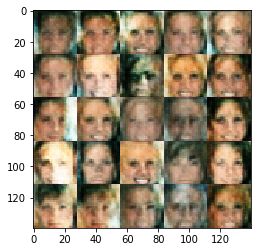

Epoch 1/1 Batch# 2510... Discriminator Loss: 1.3985... Generator Loss: 0.7925
Epoch 1/1 Batch# 2520... Discriminator Loss: 1.4670... Generator Loss: 0.7872
Epoch 1/1 Batch# 2530... Discriminator Loss: 1.4387... Generator Loss: 0.8019
Epoch 1/1 Batch# 2540... Discriminator Loss: 1.3962... Generator Loss: 0.7539
Epoch 1/1 Batch# 2550... Discriminator Loss: 1.4279... Generator Loss: 0.8143
Epoch 1/1 Batch# 2560... Discriminator Loss: 1.4066... Generator Loss: 0.7884
Epoch 1/1 Batch# 2570... Discriminator Loss: 1.4632... Generator Loss: 0.6943
Epoch 1/1 Batch# 2580... Discriminator Loss: 1.4213... Generator Loss: 0.7724
Epoch 1/1 Batch# 2590... Discriminator Loss: 1.4618... Generator Loss: 0.8459
Epoch 1/1 Batch# 2600... Discriminator Loss: 1.4091... Generator Loss: 0.7746


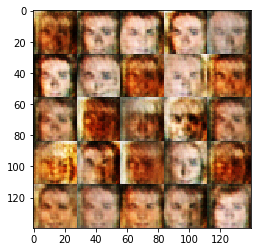

Epoch 1/1 Batch# 2610... Discriminator Loss: 1.4658... Generator Loss: 0.7325
Epoch 1/1 Batch# 2620... Discriminator Loss: 1.3739... Generator Loss: 0.7398
Epoch 1/1 Batch# 2630... Discriminator Loss: 1.3964... Generator Loss: 0.7046
Epoch 1/1 Batch# 2640... Discriminator Loss: 1.4069... Generator Loss: 0.7406
Epoch 1/1 Batch# 2650... Discriminator Loss: 1.3803... Generator Loss: 0.8559
Epoch 1/1 Batch# 2660... Discriminator Loss: 1.4286... Generator Loss: 0.7639
Epoch 1/1 Batch# 2670... Discriminator Loss: 1.3987... Generator Loss: 0.9058
Epoch 1/1 Batch# 2680... Discriminator Loss: 1.4164... Generator Loss: 0.7838
Epoch 1/1 Batch# 2690... Discriminator Loss: 1.3982... Generator Loss: 0.8038
Epoch 1/1 Batch# 2700... Discriminator Loss: 1.4971... Generator Loss: 0.7394


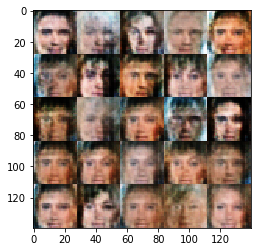

Epoch 1/1 Batch# 2710... Discriminator Loss: 1.3819... Generator Loss: 0.7865
Epoch 1/1 Batch# 2720... Discriminator Loss: 1.4189... Generator Loss: 0.6492
Epoch 1/1 Batch# 2730... Discriminator Loss: 1.4073... Generator Loss: 0.7015
Epoch 1/1 Batch# 2740... Discriminator Loss: 1.4461... Generator Loss: 0.7037
Epoch 1/1 Batch# 2750... Discriminator Loss: 1.4013... Generator Loss: 0.7632
Epoch 1/1 Batch# 2760... Discriminator Loss: 1.4301... Generator Loss: 0.7088
Epoch 1/1 Batch# 2770... Discriminator Loss: 1.3925... Generator Loss: 0.7867
Epoch 1/1 Batch# 2780... Discriminator Loss: 1.3850... Generator Loss: 0.7714
Epoch 1/1 Batch# 2790... Discriminator Loss: 1.4040... Generator Loss: 0.7628
Epoch 1/1 Batch# 2800... Discriminator Loss: 1.4222... Generator Loss: 0.7876


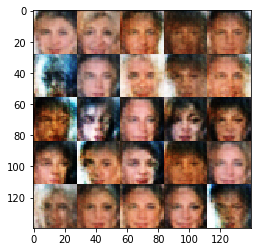

Epoch 1/1 Batch# 2810... Discriminator Loss: 1.3762... Generator Loss: 0.8132
Epoch 1/1 Batch# 2820... Discriminator Loss: 1.5010... Generator Loss: 0.7999
Epoch 1/1 Batch# 2830... Discriminator Loss: 1.4806... Generator Loss: 0.8161
Epoch 1/1 Batch# 2840... Discriminator Loss: 1.4841... Generator Loss: 0.7126
Epoch 1/1 Batch# 2850... Discriminator Loss: 1.4644... Generator Loss: 0.7129
Epoch 1/1 Batch# 2860... Discriminator Loss: 1.3965... Generator Loss: 0.8329
Epoch 1/1 Batch# 2870... Discriminator Loss: 1.4982... Generator Loss: 0.7416
Epoch 1/1 Batch# 2880... Discriminator Loss: 1.4284... Generator Loss: 0.6996
Epoch 1/1 Batch# 2890... Discriminator Loss: 1.4301... Generator Loss: 0.8246
Epoch 1/1 Batch# 2900... Discriminator Loss: 1.4364... Generator Loss: 0.6720


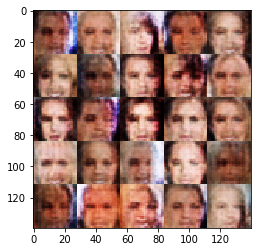

Epoch 1/1 Batch# 2910... Discriminator Loss: 1.4423... Generator Loss: 0.8131
Epoch 1/1 Batch# 2920... Discriminator Loss: 1.4184... Generator Loss: 0.7453
Epoch 1/1 Batch# 2930... Discriminator Loss: 1.4271... Generator Loss: 0.7469
Epoch 1/1 Batch# 2940... Discriminator Loss: 1.4120... Generator Loss: 0.7677
Epoch 1/1 Batch# 2950... Discriminator Loss: 1.3780... Generator Loss: 0.7578
Epoch 1/1 Batch# 2960... Discriminator Loss: 1.4494... Generator Loss: 0.6986
Epoch 1/1 Batch# 2970... Discriminator Loss: 1.4294... Generator Loss: 0.8861
Epoch 1/1 Batch# 2980... Discriminator Loss: 1.4167... Generator Loss: 0.7288
Epoch 1/1 Batch# 2990... Discriminator Loss: 1.4288... Generator Loss: 0.7390
Epoch 1/1 Batch# 3000... Discriminator Loss: 1.4027... Generator Loss: 0.7876


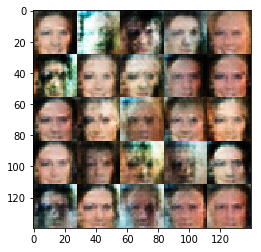

Epoch 1/1 Batch# 3010... Discriminator Loss: 1.4253... Generator Loss: 0.7408
Epoch 1/1 Batch# 3020... Discriminator Loss: 1.4357... Generator Loss: 0.7831
Epoch 1/1 Batch# 3030... Discriminator Loss: 1.4350... Generator Loss: 0.7340
Epoch 1/1 Batch# 3040... Discriminator Loss: 1.4567... Generator Loss: 0.8335
Epoch 1/1 Batch# 3050... Discriminator Loss: 1.3875... Generator Loss: 0.7656
Epoch 1/1 Batch# 3060... Discriminator Loss: 1.4371... Generator Loss: 0.6967
Epoch 1/1 Batch# 3070... Discriminator Loss: 1.4434... Generator Loss: 0.7705
Epoch 1/1 Batch# 3080... Discriminator Loss: 1.4310... Generator Loss: 0.8387
Epoch 1/1 Batch# 3090... Discriminator Loss: 1.4175... Generator Loss: 0.8544
Epoch 1/1 Batch# 3100... Discriminator Loss: 1.4179... Generator Loss: 0.8774


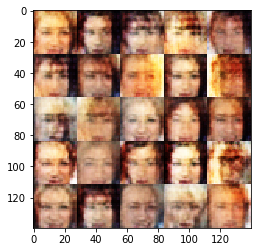

Epoch 1/1 Batch# 3110... Discriminator Loss: 1.4552... Generator Loss: 0.7696
Epoch 1/1 Batch# 3120... Discriminator Loss: 1.4328... Generator Loss: 0.8458
Epoch 1/1 Batch# 3130... Discriminator Loss: 1.3831... Generator Loss: 0.8297
Epoch 1/1 Batch# 3140... Discriminator Loss: 1.4233... Generator Loss: 0.7619
Epoch 1/1 Batch# 3150... Discriminator Loss: 1.4153... Generator Loss: 0.7865
Epoch 1/1 Batch# 3160... Discriminator Loss: 1.4470... Generator Loss: 0.8433
END


In [24]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.